# Setup

In [1]:
import os
import itertools
import cloudpickle
from collections import OrderedDict
from dotenv import load_dotenv
load_dotenv("../.env")

True

In [19]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
import urllib.request

urllib.request.urlretrieve(
    "https://github.com/google/fonts/raw/main/ofl/ibmplexmono/IBMPlexMono-Regular.ttf",
    "IBMPlexMono-Regular.ttf",
)
fe = font_manager.FontEntry(fname="IBMPlexMono-Regular.ttf", name="plexmono")
font_manager.fontManager.ttflist.append(fe)
plt.rcParams.update(
    {
        "axes.facecolor": "#f5f4e9",
        "grid.color": "#AAAAAA",
        "axes.edgecolor": "#333333",
        "figure.facecolor": "#FFFFFF",
        "axes.grid": False,
        "axes.prop_cycle": plt.cycler("color", plt.cm.Dark2.colors),
        "font.family": fe.name,
        "figure.figsize": (3.5, 3.5 / 1.2),
        "ytick.left": True,
        "xtick.bottom": True,
    }
)

import random

np.random.seed(0)
random.seed(0)

# DOE setup

In [3]:
# DhydADhyaB is being used as base bacteria. Mutations are being added on top of that
possible_mutations = ['DhyaA', 'DhydA', 'DhyaB', 'DcymA', 'DmtrA', 'DomcA', 'DmtrC']
possible_mutations = ['DhyaA', 'DcymA', 'DmtrA', 'DomcA', 'DmtrC']

shewanellas = ['WT']
for k in itertools.combinations(possible_mutations, 2):
  shewanellas.append("DhydADhyaB"+"".join(k))
for k in itertools.combinations(possible_mutations, 3):
  shewanellas.append("DhydADhyaB"+"".join(k))

# Legacy pool

In [4]:
!git clone https://github.com/ur-whitelab/BO-LIFT.git
%cd /content/BO-LIFT
!pip install . ".[gpr]" -q
import bolift

Cloning into 'BO-LIFT'...
remote: Enumerating objects: 846, done.
remote: Counting objects: 100% (176/176), done.
remote: Compressing objects: 100% (63/63), done.
remote: Total 846 (delta 129), reused 120 (delta 112), pack-reused 670
Receiving objects: 100% (846/846), 98.76 MiB | 852.00 KiB/s, done.
Resolving deltas: 100% (404/404), done.
[Errno 2] No such file or directory: '/content/BO-LIFT'
/Users/maykcaldas/Documents/WhiteLab/WL-DOE/BioNano
zsh:1: no matches found: .[gpr]


/Users/maykcaldas/miniconda3/envs/doe/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Creating the pool

In [6]:
pool_elements = []
for procedure in itertools.product(*props.values()):
  props_names = props.keys()
  d = dict(zip(props_names, procedure))

  pool_elements.append(scaffold.format(**d))

with open('pool.dat', 'w') as pool_file:
  pool_file.write('Procedure')
  pool_file.write('\n'.join(pool_elements))

print(f"Pool generated with {len(pool_elements)} elements")

NameError: name 'props' is not defined

In [ ]:
pool = bolift.Pool(pool_elements)

In [ ]:
cloudpickle.dump(pool, open("pool.pkl", "wb"))

# TreePool implementation

In [ ]:
!git clone https://github.com/ur-whitelab/BO-LIFT.git
%cd /content/BO-LIFT
!git checkout bf2f680
!pip install . .[gpr] -q
%cd /content
import bolift

Cloning into 'BO-LIFT'...
remote: Enumerating objects: 856, done.
remote: Counting objects: 100% (224/224), done.
remote: Compressing objects: 100% (101/101), done.
remote: Total 856 (delta 137), reused 178 (delta 115), pack-reused 632
Receiving objects: 100% (856/856), 97.41 MiB | 11.82 MiB/s, done.
Resolving deltas: 100% (408/408), done.
Updating files: 100% (51/51), done.
/content/BO-LIFT
Note: switching to 'bf2f680'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at bf2f680 Removed python 3.8 from the pipelin

In [ ]:
pool = bolift.TreePool(props, scaffold)
print(pool)

TreePool of 10206 with 0 selected


# bo-lift

## Generating prompts based on known data

In [8]:
import pandas as pd

# Load the Google Sheet into a Pandas DataFrame
df = pd.read_csv("BioNano Shared - exp results - formatted.csv", skiprows=[0])
df.drop(columns=df.columns[15:], inplace=True)

# Cleaning dataframe
## Remove invalid H2 values
df['H2'] = pd.to_numeric(df['H2'], errors='coerce')
df.dropna(subset=['H2'], inplace=True)
df.reset_index(drop=True, inplace=True)

## Build the mutation string
mutations = df.columns[1:8]
df[mutations] = df[mutations].astype(int)

def build_mutation(row):
  mut = ""
  for m in row.keys()[0:8]:
    if row[m] == 'Ascorbic Acid':
      mut += "Ascorbic Acid"
    else:
      mut += f"{m}" if int(row[m]) != 0 else ""
  return mut

df['mutation'] = df.apply(lambda x: build_mutation(x), axis=1)
df = df[df['mutation'] != "Ascorbic Acid"]
df.reset_index(drop=True, inplace=True)

df

,WT,DhyaA,DhydA,DhyaB,DcymA,DmtrA,DmtrC,DomcA,Starting Conc,Size,Conc,Ligand,H2,Stdev,n,mutation
0,1,0,0,0,0,0,0,0,0.05,527.0,1,MPA,20.00,"2,93",3.0,WT
1,1,0,0,0,0,0,0,0,0.05,NaN,0,MPA,10.80,0.16,2.0,WT
2,0,0,1,1,0,0,0,0,0.05,527.0,1,MPA,25.20,1.06,3.0,DhydADhyaB
3,0,0,1,1,0,0,0,0,0.05,NaN,0,MPA,0.00,0,1.0,DhydADhyaB
4,1,0,0,0,0,0,0,0,0.05,528.0,1,MPA,18.70,0.364,3.0,WT
5,0,0,1,1,0,0,0,0,0.05,528.0,1,MPA,21.90,1.62,3.0,DhydADhyaB
6,0,0,0,0,1,0,0,0,0.05,528.0,1,MPA,1.67,0.923,3.0,DcymA
7,0,0,0,0,0,1,0,0,0.05,528.0,1,MPA,4.75,0.627,3.0,DmtrA
8,0,0,0,0,0,0,1,1,0.05,528.0,1,MPA,7.17,0.141,3.0,DmtrCDomcA
9,1,0,0,0,0,0,0,0,0.05,NaN,0,NaN,6.42,5.18,2.0,WT


In [9]:
prompts, labels = [], []
for i, k in df.iterrows():
  SH_mutation =  k['mutation']
  SH_initial_conc = k['Starting Conc']
  QD_conc = k['Conc']
  QD_Size = k['Size']
  QD_material = 'CdSe'
  QD_Shape = "spheres"
  QD_Surface = k['Ligand']
  MD_growth = 'anaerobic'
  MD_medium = 'minimal'
  MD_nutrient_conc = '20'
  MD_nutrient = 'lactate'
  MD_temperature = '25'
  MD_light = '530'
  MD_shaking = '100'
  MD_time = '1'

  # shewanella = f'{mutation} Shewanella oneidensis MR-1 (initial OD600 {sh_conc})' if mutation != 'Ascorbic Acid' else f'A solution of {mutation} {sh_conc}'

  scaffold = f"{SH_mutation} Shewanella oneidensis MR-1 (initial OD600 {SH_initial_conc}) were cultured with " \
             f"{QD_conc} uM of {QD_Size} nm {QD_material} quantum dots {QD_Shape} capped with {QD_Surface} in an " \
             f"{MD_growth} {MD_medium} medium solution containing {MD_nutrient_conc} mM {MD_nutrient} at {MD_temperature} ºC. " \
             f"Cultures were irradiated with {MD_light} nm LEDs while shaking the solution up to {MD_shaking} RPM for {MD_time} week. "
  label = k['H2']

  prompts.append(scaffold)
  labels.append(label)


## Test prediction

In [10]:
import bolift

In [11]:
import numpy as np
indexes = np.arange(len(prompts))
np.random.shuffle(indexes)
split = (len(indexes)-5)/len(indexes)

train_indexes = indexes[:int(split*len(indexes))]
test_indexes = indexes[int(split*len(indexes)):]

In [12]:
asktell = bolift.AskTellFewShotTopk(
    prefix="The following are correctly answered questions about H2 production by Shewanella oneidensis MR-1 and quantum dots. " \
          " Each answer should be numeric and ends with ###",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="H2 production",
    y_formatter=lambda y: f"{y:.2f}",
    model="gpt-4",
    selector_k=5,
    temperature=0.7
)

for i in train_indexes:
  asktell.tell(prompts[i], labels[i])

In [13]:
yhat=[]
y=[]
for i in test_indexes:
  yhat.append(asktell.predict(prompts[i]))
  y.append(labels[i])

In [14]:
for i in test_indexes:
  print(f"{prompts[i]} => {labels[i]}")

[f"{i.mean():.2f}" for i in yhat], y

DhyaA Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 525.0 nm CdSe quantum dots spheres capped with MPA in an anaerobic minimal medium solution containing 20 mM lactate at 25 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 100 RPM for 1 week.  => 16.1
WT Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 525.0 nm CdSe quantum dots spheres capped with MPA in an anaerobic minimal medium solution containing 20 mM lactate at 25 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 100 RPM for 1 week.  => 13.9
WT Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 524.0 nm CdSe quantum dots spheres capped with MPA in an anaerobic minimal medium solution containing 20 mM lactate at 25 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 100 RPM for 1 week.  => 28.7
DhyaA Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 

(['19.90', '14.10', '13.70', '20.98', '8.49'], [16.1, 13.9, 28.7, 21.8, 8.38])

|        predicted        |   label    |     AE     | 
|   19.90   +/-  11.92    |   16.10    |    3.80    |
|   14.10   +/-  11.92    |   13.90    |    0.20    |
|   13.70   +/-   0.15    |   28.70    |   15.00    |
|   20.98   +/-   0.35    |   21.80    |    0.82    |
|    8.49   +/-   0.26    |    8.38    |    0.11    |

               MAE: 3.98              


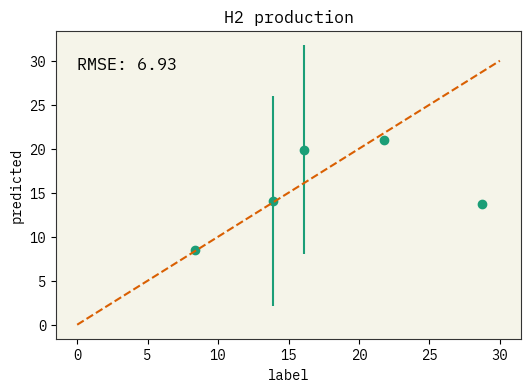

In [20]:
def rmse(a, b):
  a = np.array(a)
  b = np.array(b)
  return np.sqrt(np.mean((a - b)**2))

sum = 0
print(f"| {'predicted':^23s} | {'label':^10s} | {'AE':^10s} | ")
n = 0
for ihat, i in zip(yhat, y):
  if i>30: continue
  n+=1
  mae = abs(ihat.mean()-i)
  print(f"| {ihat.mean():^10.2f}+/-{ihat.std():^10.2f} | {i:^10.2f} | {mae:^10.2f} |")
  sum += mae
print(f"\n{'MAE: ':>20s}{sum/n:<18.2f}")

import matplotlib.pyplot as plt
y_plot    = np.array(y)[np.where(np.array(y) >= 0)]
yhat_plot = np.array([ihat.mean() for ihat in yhat])[np.where(np.array(y) >= 0)]
yerr_plot = np.array([ihat.std() for ihat in yhat])[np.where(np.array(y) >= 0)]
plt.figure(figsize=(6, 4))
plt.xlabel('label')
plt.ylabel('predicted')
plt.plot(y_plot, yhat_plot, 'o')
plt.errorbar(y_plot, yhat_plot, yerr=yerr_plot, fmt='none')
plt.title('H2 production')
plt.plot((0,30), (0,30), '--')
plt.text(0, 29, f"RMSE: {rmse(y_plot, yhat_plot):.2f}", fontsize=12)
plt.show()

## Running the Bayesian optimization

In [ ]:
asktell = bolift.AskTellFewShotTopk(
    prefix="The following are correctly answered questions about H2 production by Shewanella oneidensis MR-1 and quantum dots. " \
          " Each answer should be numeric and ends with ###",
    x_formatter=lambda x: f"the experimental procedure: {x}",
    y_name="H2 production",
    y_formatter=lambda y: f"{y:.2f}",
    # model="gpt-4",
    model="text-davinci-003",
    selector_k=5,
    temperature=0.7
)

for p, l in zip(prompts, labels):
  asktell.tell(p, l)

In [ ]:
pool = cloudpickle.load(open("./pool.pkl", "rb"))

In [ ]:
asktell.ask(pool, "probability_of_improvement", 5)

(['DhydADhyaBDcymADomcADmtrC Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 535 nm CdSe quantum dots palettes capped with Cys (cystine) in an anaerobic minimum medium solution containing 20 mM lactate at 45 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 100 RPM for 1 week. ',
  'DhydADhyaBDmtrADomcADmtrC Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 0.5 uM of 510 nm CdSe quantum dots spheres capped with Cys (cystine) in an anaerobic minimum medium solution containing 20 mM lactate at 45 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 50 RPM for 1 week. ',
  'DhydADhyaBDcymADomcADmtrC Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 520 nm CdSe quantum dots palettes capped with GSH (glutathione) in an anaerobic minimum medium solution containing 20 mM lactate at 25 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 150 RPM 

In [ ]:
asktell.ask(pool, "expected_improvement", 5)

(['DhydADhyaBDcymADomcADmtrC Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 535 nm CdSe quantum dots palettes capped with Cys (cystine) in an anaerobic minimum medium solution containing 20 mM lactate at 45 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 100 RPM for 1 week. ',
  'DhydADhyaBDhyaADmtrA Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 1 uM of 510 nm CdSe quantum dots palettes capped with MPA (3-mercaptopropionic acid) in an anaerobic minimum medium solution containing 20 mM lactate at 45 ºC. Cultures were irradiated with 530 nm LEDs while shaking the solution up to 50 RPM for 1 week. ',
  'DhydADhyaBDmtrADomcADmtrC Shewanella oneidensis MR-1 (initial OD600 0.05) were cultured with 0.5 uM of 510 nm CdSe quantum dots palettes capped with MPA (3-mercaptopropionic acid) in an anaerobic minimum medium solution containing 20 mM lactate at 5 ºC. Cultures were irradiated with 530 nm LEDs while shaking th